In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
# set to display all the columns in dataset
pd.set_option("display.max_columns",None)
#to run sql quries on data frame
import pandasql as psql

In [2]:
#load general dataset
credit_card=pd.read_csv(r"C:\Users\Dlc\Desktop\21b91a12b9\clean_data.csv",header=0)
# Copy to back-up file
credit_card_bk=credit_card.copy()
# Display first 5 records
credit_card.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [3]:
# Display the dataset information
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [4]:
#display the null values in the dataset by count in each variable
credit_card.isnull().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

In [5]:
 #display duplicate values in dataset
credit_card.duplicated().any()

False

In [6]:
#Display the unique values of all the variables 
credit_card.nunique()

ID                 9709
Gender                2
Own_car               2
Own_property          2
Work_phone            2
Phone                 2
Email                 2
Unemployed            2
Num_children          9
Num_family           10
Account_length       61
Total_income        263
Age                7172
Years_employed     3637
Income_type           5
Education_type        5
Family_status         5
Housing_type          6
Occupation_type      19
Target                2
dtype: int64

In [7]:
#display the unique values by count for 'Target'
credit_card['Target'].value_counts()

0    8426
1    1283
Name: Target, dtype: int64

In [8]:
#this comes under the classification algorithms 
#Count the target or dependent variable by '0' and '1' and their proportion
#(> 10:1, then the dataset is imbalance data)
Target_count=credit_card.Target.value_counts()
print("Class 0: ",Target_count[0])
print("Class 1: ",Target_count[1])
print("Proportion: ",round(Target_count[0]/Target_count[1],2),':1')
print("Total records: ",len(credit_card))

Class 0:  8426
Class 1:  1283
Proportion:  6.57 :1
Total records:  9709


In [9]:
# Display the dataset information
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [10]:
# Use LabelEncoder to handle categorical data
cols = ['Income_type','Education_type','Family_status','Housing_type','Occupation_type']
for i in cols:
    #use LableEncoder for target variables
    from sklearn.preprocessing import LabelEncoder
    LE=LabelEncoder()
    credit_card[i]=LE.fit_transform(credit_card[i])

In [11]:
# Display the dataset information
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   int32  
 15  Education_type   9709 non-null   int32  
 16  Family_status    9709 non-null   int32  
 17  Housing_type  

In [12]:
#display the Descriptive statistics
credit_card.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,2.369451,3.150170,1.379648,1.274488,9.221135,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,1.742539,1.315303,0.970125,0.929836,4.275584,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,1.000000,1.000000,1.000000,1.000000,6.000000,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,4.000000,4.000000,1.000000,1.000000,10.000000,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,4.000000,4.000000,1.000000,1.000000,12.000000,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,4.000000,4.000000,4.000000,5.000000,18.000000,1.000000


In [13]:
#Identify the independent and Target(dependent) variables
IndepVar=[]
for col in credit_card.columns:
    if col!='Target':
        IndepVar.append(col)
TargetVar='Target'
x=credit_card[IndepVar]
y=credit_card[TargetVar]

In [14]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=143)
#Display the shape of train and test data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6796, 19), (2913, 19), (6796,), (2913,))

In [15]:
#scaling the features by minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_train=scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)
x_test=scaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

In [16]:
#load  KNN_Results dataset
KNN_Results=pd.read_csv(r"C:\Users\Dlc\Desktop\21b91a12b9\KNN_Results.csv",header=0)
# Display records
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN ALGORITHM

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[  59  323]
 [ 359 2172]]
Outcome values : 
 59 323 359 2172
Classification report : 
               precision    recall  f1-score   support

           1       0.14      0.15      0.15       382
           0       0.87      0.86      0.86      2531

    accuracy                           0.77      2913
   macro avg       0.51      0.51      0.51      2913
weighted avg       0.77      0.77      0.77      2913

Accuracy : 76.6 %
Precision : 14.1 %
Recall : 15.4 %
F1 Score : 0.148
Specificity or True Negative Rate : 85.8 %
Balanced Accuracy : 50.6 %
MCC : 0.012
roc_auc_score: 0.506


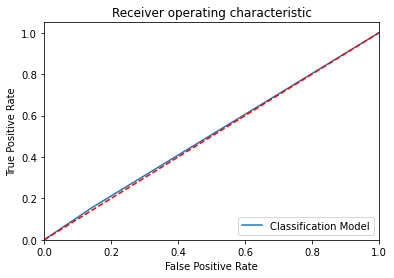

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[   9  373]
 [  48 2483]]
Outcome values : 
 9 373 48 2483
Classification report : 
               precision    recall  f1-score   support

           1       0.16      0.02      0.04       382
           0       0.87      0.98      0.92      2531

    accuracy                           0.86      2913
   macro avg       0.51      0.50      0.48      2913
weighted avg       0.78      0.86      0.81      2913

Accuracy : 85.5 %
Precision : 15.8 %
Recall : 2.4 %
F1 Score : 0.041
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 50.2 %
MCC : 0.011
roc_auc_score: 0.502


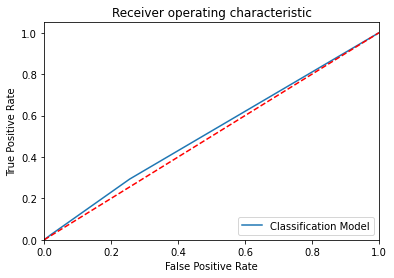

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[  19  363]
 [ 132 2399]]
Outcome values : 
 19 363 132 2399
Classification report : 
               precision    recall  f1-score   support

           1       0.13      0.05      0.07       382
           0       0.87      0.95      0.91      2531

    accuracy                           0.83      2913
   macro avg       0.50      0.50      0.49      2913
weighted avg       0.77      0.83      0.80      2913

Accuracy : 83.0 %
Precision : 12.6 %
Recall : 5.0 %
F1 Score : 0.071
Specificity or True Negative Rate : 94.8 %
Balanced Accuracy : 49.9 %
MCC : -0.004
roc_auc_score: 0.499


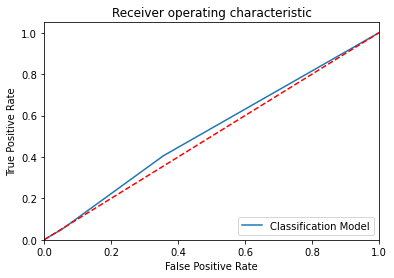

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[   4  378]
 [  32 2499]]
Outcome values : 
 4 378 32 2499
Classification report : 
               precision    recall  f1-score   support

           1       0.11      0.01      0.02       382
           0       0.87      0.99      0.92      2531

    accuracy                           0.86      2913
   macro avg       0.49      0.50      0.47      2913
weighted avg       0.77      0.86      0.81      2913

Accuracy : 85.9 %
Precision : 11.1 %
Recall : 1.0 %
F1 Score : 0.019
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 49.8 %
MCC : -0.007
roc_auc_score: 0.499


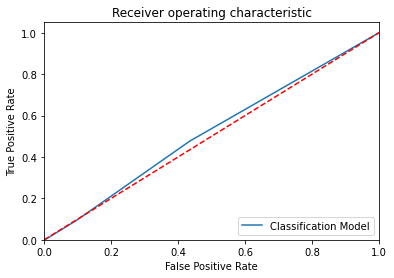

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[   8  374]
 [  58 2473]]
Outcome values : 
 8 374 58 2473
Classification report : 
               precision    recall  f1-score   support

           1       0.12      0.02      0.04       382
           0       0.87      0.98      0.92      2531

    accuracy                           0.85      2913
   macro avg       0.49      0.50      0.48      2913
weighted avg       0.77      0.85      0.80      2913

Accuracy : 85.2 %
Precision : 12.1 %
Recall : 2.1 %
F1 Score : 0.036
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 49.9 %
MCC : -0.004
roc_auc_score: 0.499


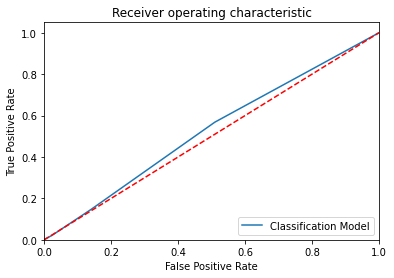

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[   2  380]
 [   9 2522]]
Outcome values : 
 2 380 9 2522
Classification report : 
               precision    recall  f1-score   support

           1       0.18      0.01      0.01       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.53      0.50      0.47      2913
weighted avg       0.78      0.87      0.81      2913

Accuracy : 86.6 %
Precision : 18.2 %
Recall : 0.5 %
F1 Score : 0.01
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 50.0 %
MCC : 0.009
roc_auc_score: 0.501


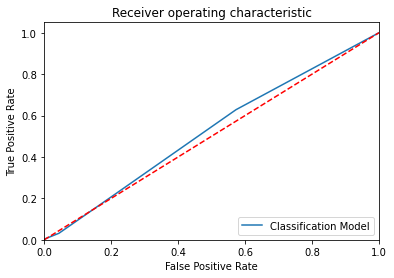

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[   4  378]
 [  27 2504]]
Outcome values : 
 4 378 27 2504
Classification report : 
               precision    recall  f1-score   support

           1       0.13      0.01      0.02       382
           0       0.87      0.99      0.93      2531

    accuracy                           0.86      2913
   macro avg       0.50      0.50      0.47      2913
weighted avg       0.77      0.86      0.81      2913

Accuracy : 86.1 %
Precision : 12.9 %
Recall : 1.0 %
F1 Score : 0.019
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 50.0 %
MCC : -0.001
roc_auc_score: 0.5


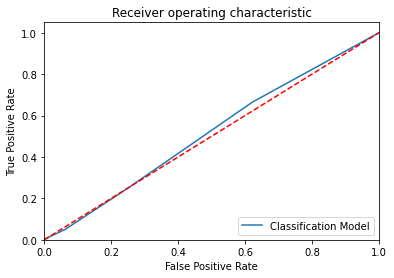

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[   1  381]
 [   5 2526]]
Outcome values : 
 1 381 5 2526
Classification report : 
               precision    recall  f1-score   support

           1       0.17      0.00      0.01       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.52      0.50      0.47      2913
weighted avg       0.78      0.87      0.81      2913

Accuracy : 86.7 %
Precision : 16.7 %
Recall : 0.3 %
F1 Score : 0.005
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 50.0 %
MCC : 0.005
roc_auc_score: 0.5


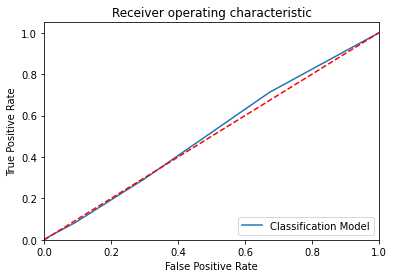

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[   1  381]
 [  12 2519]]
Outcome values : 
 1 381 12 2519
Classification report : 
               precision    recall  f1-score   support

           1       0.08      0.00      0.01       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.47      0.50      0.47      2913
weighted avg       0.76      0.87      0.81      2913

Accuracy : 86.5 %
Precision : 7.7 %
Recall : 0.3 %
F1 Score : 0.005
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 49.9 %
MCC : -0.011
roc_auc_score: 0.499


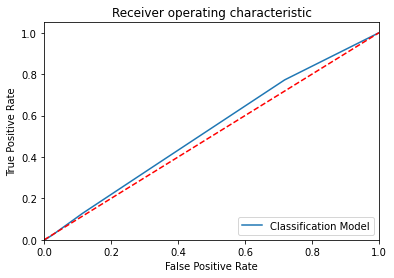

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[   0  382]
 [   1 2530]]
Outcome values : 
 0 382 1 2530
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.75      0.87      0.81      2913

Accuracy : 86.9 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : -0.007
roc_auc_score: 0.5


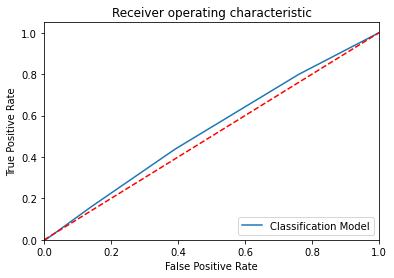

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[   0  382]
 [   2 2529]]
Outcome values : 
 0 382 2 2529
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.75      0.87      0.81      2913

Accuracy : 86.8 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.0 %
MCC : -0.01
roc_auc_score: 0.5


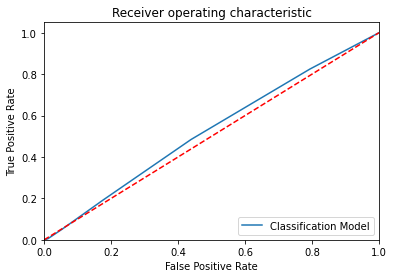

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[   0  382]
 [   1 2530]]
Outcome values : 
 0 382 1 2530
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.75      0.87      0.81      2913

Accuracy : 86.9 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : -0.007
roc_auc_score: 0.5


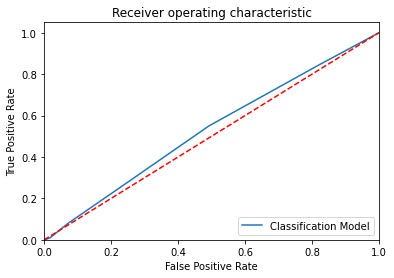

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[   0  382]
 [   1 2530]]
Outcome values : 
 0 382 1 2530
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.75      0.87      0.81      2913

Accuracy : 86.9 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : -0.007
roc_auc_score: 0.5


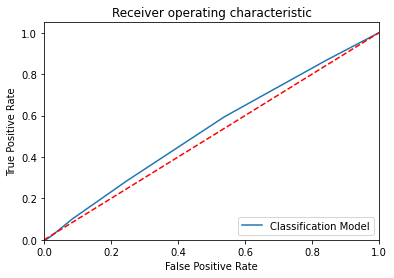

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[   0  382]
 [   1 2530]]
Outcome values : 
 0 382 1 2530
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.75      0.87      0.81      2913

Accuracy : 86.9 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : -0.007
roc_auc_score: 0.5


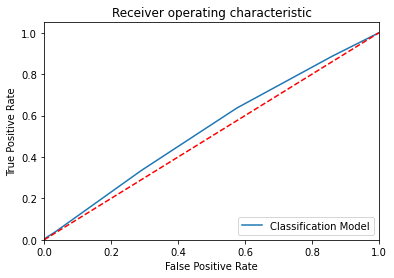

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[   0  382]
 [   1 2530]]
Outcome values : 
 0 382 1 2530
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.75      0.87      0.81      2913

Accuracy : 86.9 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : -0.007
roc_auc_score: 0.5


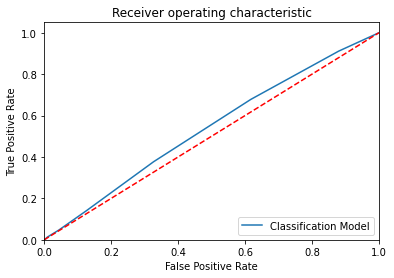

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[   0  382]
 [   0 2531]]
Outcome values : 
 0 382 0 2531
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.75      0.87      0.81      2913

Accuracy : 86.9 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


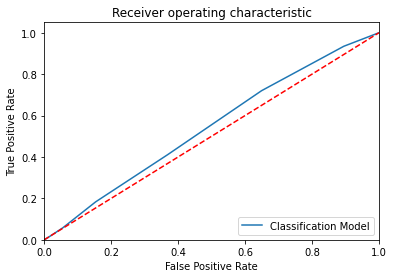

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[   0  382]
 [   0 2531]]
Outcome values : 
 0 382 0 2531
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.75      0.87      0.81      2913

Accuracy : 86.9 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


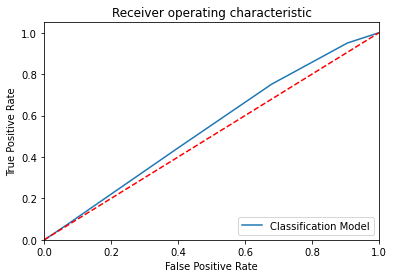

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[   0  382]
 [   0 2531]]
Outcome values : 
 0 382 0 2531
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.75      0.87      0.81      2913

Accuracy : 86.9 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


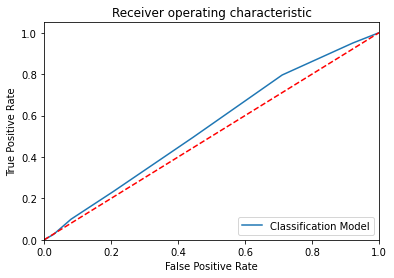

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[   0  382]
 [   0 2531]]
Outcome values : 
 0 382 0 2531
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.75      0.87      0.81      2913

Accuracy : 86.9 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


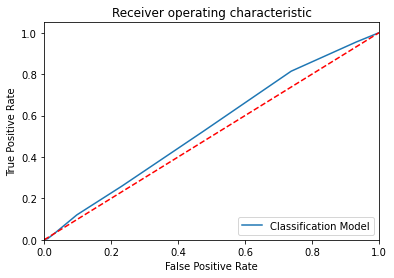

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[   0  382]
 [   0 2531]]
Outcome values : 
 0 382 0 2531
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.75      0.87      0.81      2913

Accuracy : 86.9 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


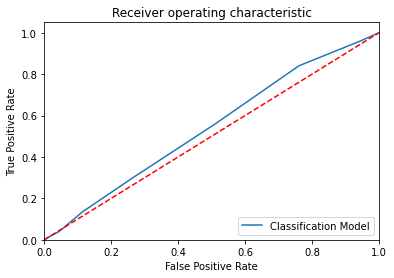

In [17]:
# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [18]:
#display first ten records
KNN_Results.head(10)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,59,323,359,2172,0.766,0.141,0.154,0.148,0.858,0.012,0.506305,0.506
1,KNeighborsClassifier(n_neighbors=2),2,9,373,48,2483,0.855,0.158,0.024,0.041,0.981,0.011,0.502298,0.502
2,KNeighborsClassifier(n_neighbors=3),3,19,363,132,2399,0.83,0.126,0.05,0.071,0.948,-0.004,0.498792,0.499
3,KNeighborsClassifier(n_neighbors=4),4,4,378,32,2499,0.859,0.111,0.01,0.019,0.987,-0.007,0.498914,0.498
4,KNeighborsClassifier(),5,8,374,58,2473,0.852,0.121,0.021,0.036,0.977,-0.004,0.499013,0.499
5,KNeighborsClassifier(n_neighbors=6),6,2,380,9,2522,0.866,0.182,0.005,0.01,0.996,0.009,0.50084,0.5
6,KNeighborsClassifier(n_neighbors=7),7,4,378,27,2504,0.861,0.129,0.01,0.019,0.989,-0.001,0.499902,0.5
7,KNeighborsClassifier(n_neighbors=8),8,1,381,5,2526,0.867,0.167,0.003,0.005,0.998,0.005,0.500321,0.5
8,KNeighborsClassifier(n_neighbors=9),9,1,381,12,2519,0.865,0.077,0.003,0.005,0.995,-0.011,0.498938,0.499
9,KNeighborsClassifier(n_neighbors=10),10,0,382,1,2530,0.869,0.0,0.0,0.0,1.0,-0.007,0.499802,0.5


In [19]:
#load general dataset
EMResults1=pd.read_csv(r"C:\Users\Dlc\Desktop\21b91a12b9\EMResults.csv",header=0)
#display records
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVM Linear kernel

Model Name:  SVM - Linear
Confusion matrix : 
 [[   0  382]
 [   0 2531]]
Outcome values : 
 0 382 0 2531
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.75      0.87      0.81      2913

Accuracy : 86.9 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


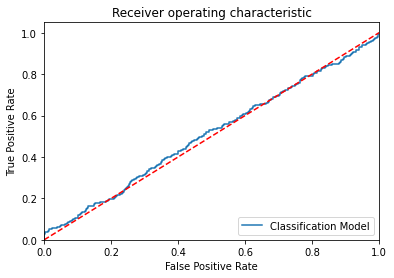

-----------------------------------------------------------------------------------------------------


In [20]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

# SVM -Polynomial

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[   0  382]
 [   0 2531]]
Outcome values : 
 0 382 0 2531
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.75      0.87      0.81      2913

Accuracy : 86.9 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


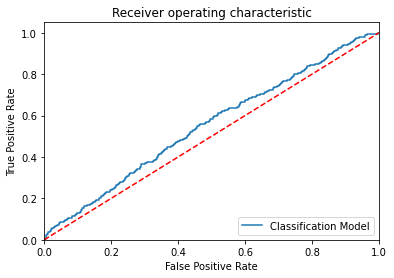

-----------------------------------------------------------------------------------------------------


In [21]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

# SVM sigmoid kernel

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[ 203  179]
 [1242 1289]]
Outcome values : 
 203 179 1242 1289
Classification report : 
               precision    recall  f1-score   support

           1       0.14      0.53      0.22       382
           0       0.88      0.51      0.64      2531

    accuracy                           0.51      2913
   macro avg       0.51      0.52      0.43      2913
weighted avg       0.78      0.51      0.59      2913

Accuracy : 51.2 %
Precision : 14.0 %
Recall : 53.1 %
F1 Score : 0.222
Specificity or True Negative Rate : 50.9 %
Balanced Accuracy : 52.0 %
MCC : 0.027
roc_auc_score: 0.52


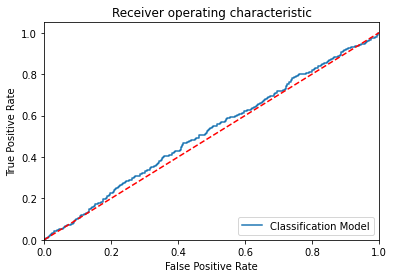

-----------------------------------------------------------------------------------------------------


In [22]:

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

# SVM gaussian

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[ 181  201]
 [1113 1418]]
Outcome values : 
 181 201 1113 1418
Classification report : 
               precision    recall  f1-score   support

           1       0.14      0.47      0.22       382
           0       0.88      0.56      0.68      2531

    accuracy                           0.55      2913
   macro avg       0.51      0.52      0.45      2913
weighted avg       0.78      0.55      0.62      2913

Accuracy : 54.9 %
Precision : 14.0 %
Recall : 47.4 %
F1 Score : 0.216
Specificity or True Negative Rate : 56.0 %
Balanced Accuracy : 51.7 %
MCC : 0.023
roc_auc_score: 0.517


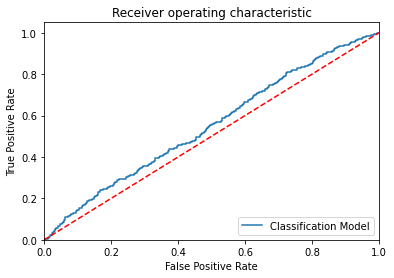

-----------------------------------------------------------------------------------------------------


In [23]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

In [24]:
#display first ten records
EMResults1.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,382,0,2531,0.869,NaN,0.0,0.0,1.0,NaN,0.5,0.5
1,SVM - Polynominal,0,382,0,2531,0.869,NaN,0.0,0.0,1.0,NaN,0.5,0.5
2,SVM - Sigmoid,203,179,1242,1289,0.512,0.14,0.531,0.222,0.509,0.027,0.520349,0.52
3,SVM - Gaussian,181,201,1113,1418,0.549,0.14,0.474,0.216,0.56,0.023,0.517037,0.517


In [25]:
#load EMResults dataset
EMResults=pd.read_csv(r"C:\Users\Dlc\Desktop\21b91a12b9\EMResults.csv",header=0)
# Display the records
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# compare the algorithms

Model Name:  LogisticRegression()
Confusion matrix : 
 [[   0  382]
 [   0 2531]]
Outcome values : 
 0 382 0 2531
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.75      0.87      0.81      2913

Accuracy : 86.9 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


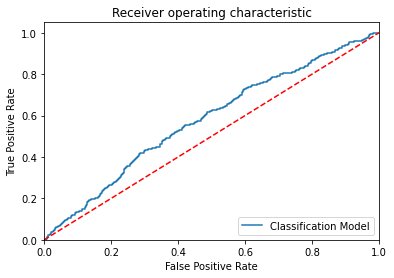

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  58  324]
 [ 374 2157]]
Outcome values : 
 58 324 374 2157
Classification report : 
               precision    recall  f1-score   support

           1       0.13      0.15      0.14       382
           0       0.87      0.85      0.86      2531

    accuracy                           0.76      2913
   macro avg       0.50      0.50      0.50      2913
weighted avg       0.77      0.76      0.77      2913

Accuracy : 76.0 %
Precision : 13.4 %
Recall : 15.2 %
F1 Score : 0.143
Specificity or True Negative Rate : 85.2 %
Balanced Accuracy : 50.2 %
MCC : 0.004
roc_auc_score: 0.502


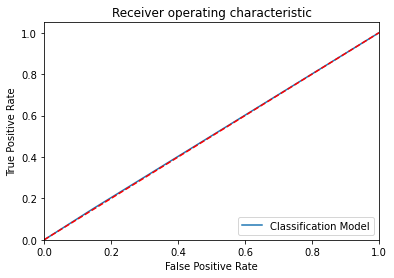

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[   0  382]
 [   4 2527]]
Outcome values : 
 0 382 4 2527
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.75      0.87      0.81      2913

Accuracy : 86.7 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 49.9 %
MCC : -0.014
roc_auc_score: 0.499


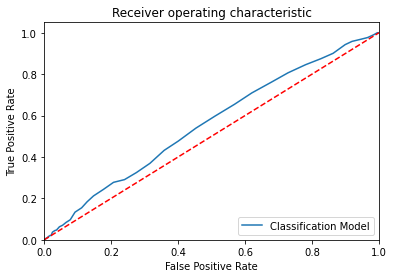

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[   2  380]
 [   4 2527]]
Outcome values : 
 2 380 4 2527
Classification report : 
               precision    recall  f1-score   support

           1       0.33      0.01      0.01       382
           0       0.87      1.00      0.93      2531

    accuracy                           0.87      2913
   macro avg       0.60      0.50      0.47      2913
weighted avg       0.80      0.87      0.81      2913

Accuracy : 86.8 %
Precision : 33.3 %
Recall : 0.5 %
F1 Score : 0.01
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 50.1 %
MCC : 0.027
roc_auc_score: 0.502


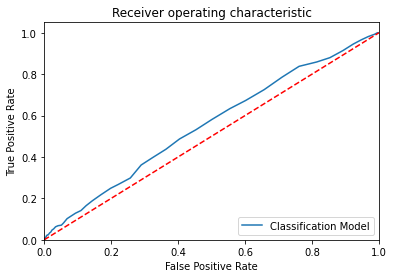

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[  59  323]
 [ 359 2172]]
Outcome values : 
 59 323 359 2172
Classification report : 
               precision    recall  f1-score   support

           1       0.14      0.15      0.15       382
           0       0.87      0.86      0.86      2531

    accuracy                           0.77      2913
   macro avg       0.51      0.51      0.51      2913
weighted avg       0.77      0.77      0.77      2913

Accuracy : 76.6 %
Precision : 14.1 %
Recall : 15.4 %
F1 Score : 0.148
Specificity or True Negative Rate : 85.8 %
Balanced Accuracy : 50.6 %
MCC : 0.012
roc_auc_score: 0.506


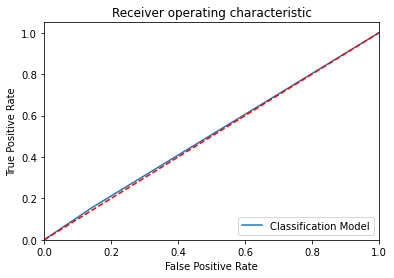

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', kernel='sigmoid', probability=True,
    random_state=42)
Confusion matrix : 
 [[ 203  179]
 [1242 1289]]
Outcome values : 
 203 179 1242 1289
Classification report : 
               precision    recall  f1-score   support

           1       0.14      0.53      0.22       382
           0       0.88      0.51      0.64      2531

    accuracy                           0.51      2913
   macro avg       0.51      0.52      0.43      2913
weighted avg       0.78      0.51      0.59      2913

Accuracy : 51.2 %
Precision : 14.0 %
Recall : 53.1 %
F1 Score : 0.222
Specificity or True Negative Rate : 50.9 %
Balanced Accuracy : 52.0 %
MCC : 0.027
roc_auc_score: 0.52


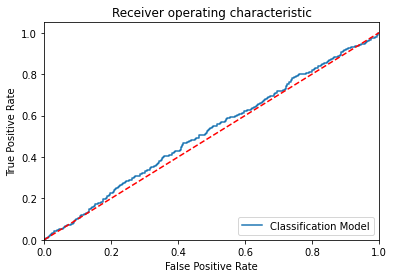

-----------------------------------------------------------------------------------------------------


In [26]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=1)
ModelSVM = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #------------------------------------------------------------------------------------------------------------------


In [27]:
#display first ten records
EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0,382,0,2531,0.869,NaN,0.0,0.0,1.0,NaN,0.5,0.5
1,DecisionTreeClassifier(),58,324,374,2157,0.76,0.134,0.152,0.143,0.852,0.004,0.502032,0.502
2,"(DecisionTreeClassifier(max_features='auto', r...",0,382,4,2527,0.867,0.0,0.0,0.0,0.998,-0.014,0.49921,0.499
3,"(ExtraTreeClassifier(random_state=803750765), ...",2,380,4,2527,0.868,0.333,0.005,0.01,0.998,0.027,0.501828,0.501
4,KNeighborsClassifier(n_neighbors=1),59,323,359,2172,0.766,0.141,0.154,0.148,0.858,0.012,0.506305,0.506
5,"SVC(class_weight='balanced', kernel='sigmoid',...",203,179,1242,1289,0.512,0.14,0.531,0.222,0.509,0.027,0.520349,0.52


In [28]:
#predicting the value through the svc algorithm
y_pred=ModelSVM.predict(x_test)

In [29]:
#display the final results 
Results = pd.DataFrame({'Target_A':y_test, 'Target_P':y_pred})
#Merge two Dataframes on index of both the dataframes
ResultsFinal = credit_card_bk.merge(Results,left_index=True,right_index=True)
#display 10 records randomly
ResultsFinal.sample(20)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target,Target_A,Target_P
1171,5025030,0,1,0,0,1,0,0,0,2,11,90000.0,51.067441,15.422630,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,0,0,1
7224,5113020,1,1,1,0,0,0,0,0,2,15,202500.0,40.033676,6.020658,State servant,Secondary / secondary special,Married,House / apartment,Core staff,0,0,0
2304,5036737,0,0,1,0,0,0,0,2,4,12,225000.0,37.227322,1.516800,Working,Incomplete higher,Civil marriage,House / apartment,Managers,0,0,1
1573,5029175,1,0,0,0,0,0,0,0,1,17,202500.0,48.302155,9.103541,Working,Secondary / secondary special,Single / not married,Municipal apartment,Laborers,0,0,1
1104,5024912,0,1,0,1,0,0,0,2,4,12,135000.0,23.866335,5.084293,Working,Secondary / secondary special,Married,House / apartment,Core staff,0,0,1
2322,5036770,0,1,1,1,1,0,0,0,2,14,157500.0,40.559354,6.683231,Working,Higher education,Married,House / apartment,Laborers,0,0,0
6048,5092396,1,1,1,0,0,0,0,0,2,20,360000.0,30.420885,5.464862,Working,Secondary / secondary special,Married,House / apartment,Laborers,0,0,0
8772,5137300,1,1,0,0,1,0,0,2,3,45,157500.0,37.000075,3.715340,Commercial associate,Higher education,Separated,Office apartment,Managers,0,0,1
809,5023551,0,0,0,0,0,0,0,0,1,15,202500.0,33.558526,5.390939,Commercial associate,Higher education,Single / not married,House / apartment,Managers,0,0,0
2503,5037195,0,0,1,0,0,0,1,0,1,37,90000.0,60.562503,0.000000,Pensioner,Secondary / secondary special,Widow,House / apartment,Other,0,0,1
